In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import os
import sys
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
import torch.nn as nn

import torch

from scipy.stats import spearmanr

In [2]:
init_data = pd.read_hdf('/home/laiminzhi/wenbin/DL_stock_combo/data/xy_data/xy_data.h5')

In [4]:
x = init_data.head()

In [2]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np
# 训练集数据
train_data = [1, 2, 3, 4, 5]

# 测试集数据
test_data = [3, 4, 5, 6, 7]
# 转换为二维数组
train_data = np.array(train_data).reshape(-1, 1)

# 初始化 QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=len(train_data))

# Fit 训练集数据
transformer.fit(train_data)

# 转换为二维数组
test_data = np.array(test_data).reshape(-1, 1)

# Transform 测试集数据
transformed_test_data = transformer.transform(test_data)
transformed_train_data = transformer.transform(train_data)

In [5]:
train_x = pd.read_hdf('./train_data/y1_label_rank_all_normal/train_x.h5')
valid_x = pd.read_hdf('./train_data/y1_label_rank_all_normal/valid_x.h5')
train_x.replace([np.inf, -np.inf], np.nan, inplace=True)
valid_x.replace([np.inf, -np.inf], np.nan, inplace=True)
train_x.fillna(0, inplace=True)
valid_x.fillna(0, inplace=True)
describe_train = train_x.describe()
describe_valid = valid_x.describe()

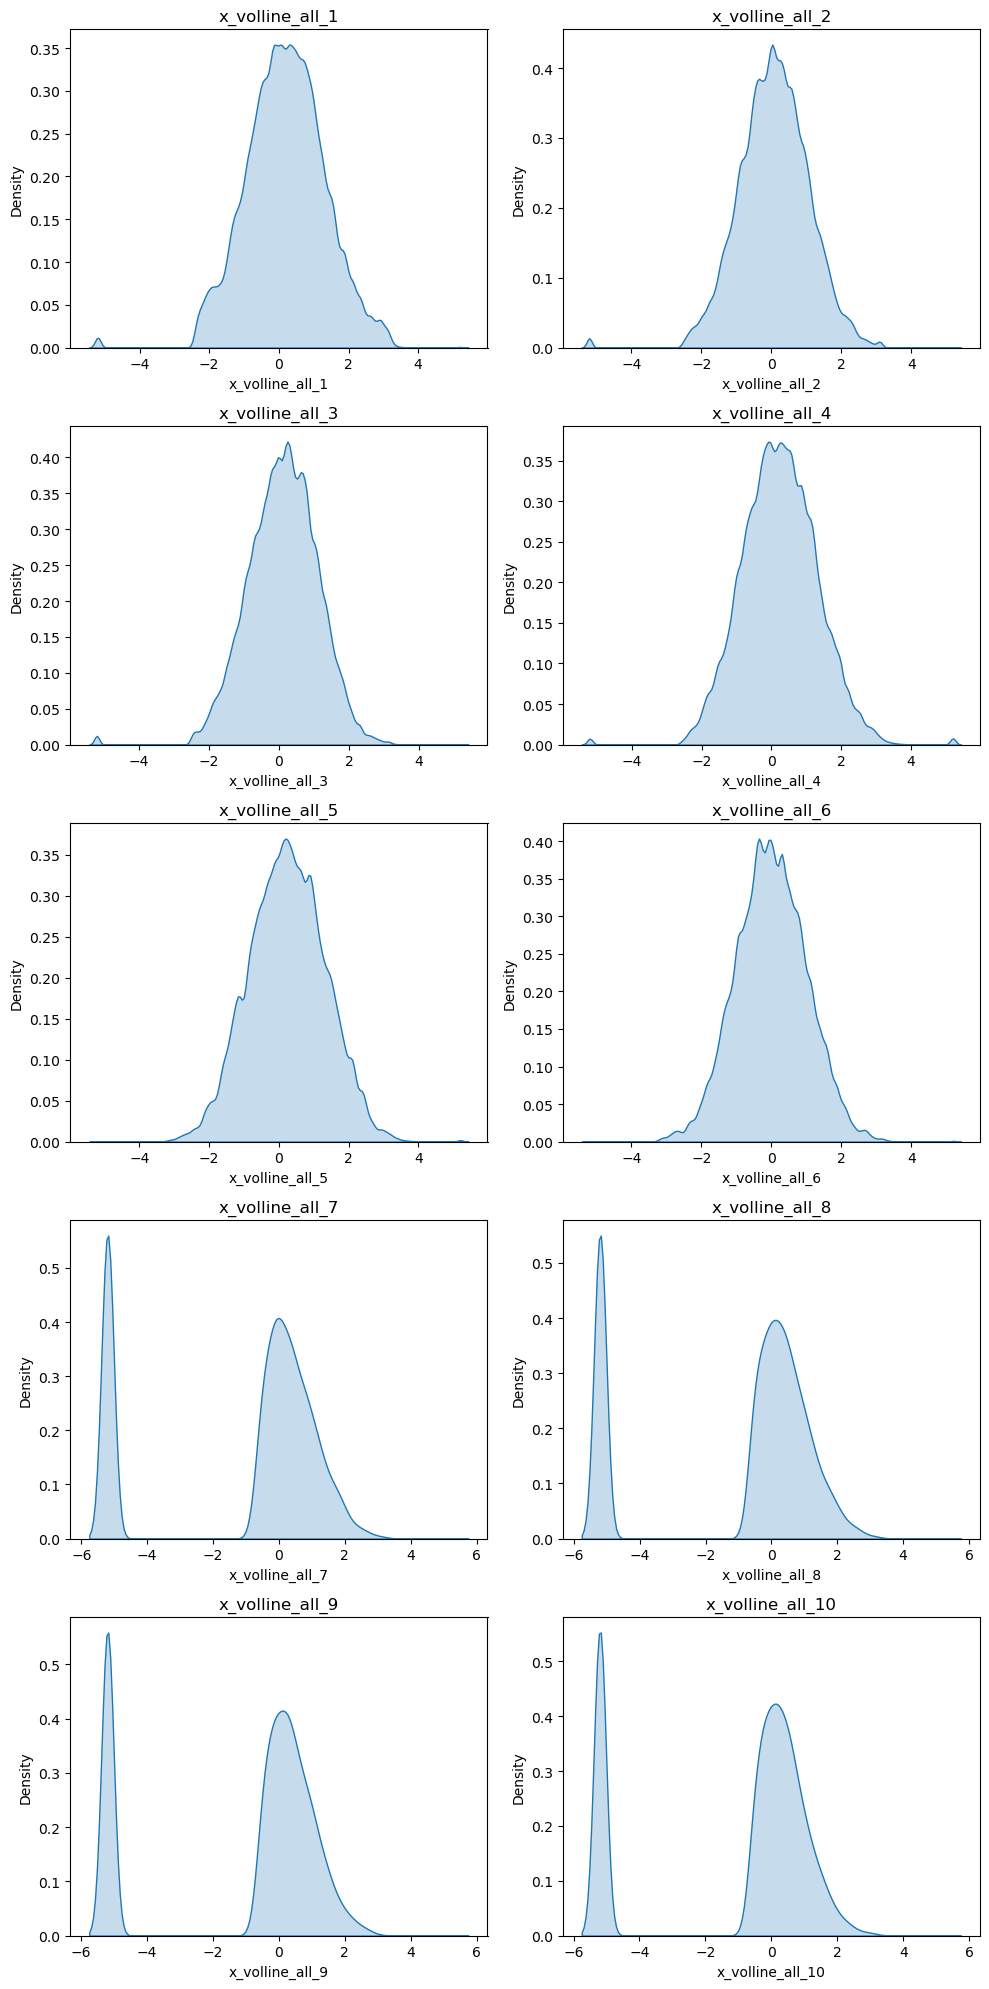

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# 忽略特定的 FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning, message="use_inf_as_na option is deprecated")
columns_to_plot = valid_x.columns[0:10]  # 选择前10列

num_plots = len(columns_to_plot)
num_cols = 2  # 一行显示 2 个图
num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

plt.figure(figsize=(10, num_rows * 4))

for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.kdeplot(valid_x[col], fill=True)
    plt.title(col)

plt.tight_layout()

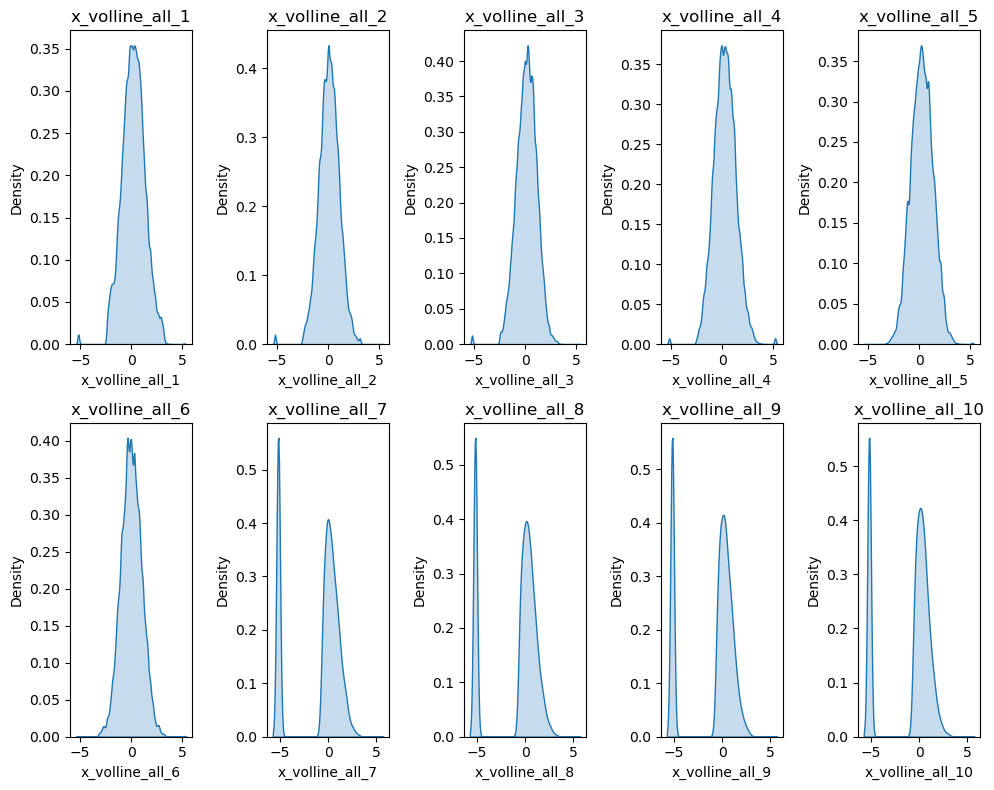

In [10]:
train_columns_to_plot = train_x.columns[0:10]  # 选择前10列
def plot_distribution(columns_to_plot):
    num_plots = len(columns_to_plot)
    num_cols = 5  # 一行显示 num_cols 个图
    num_rows = num_plots // num_cols + (num_plots % num_cols > 0)

    plt.figure(figsize=(10, num_rows * 4))

    for i, col in enumerate(columns_to_plot):
        plt.subplot(num_rows, num_cols, i + 1)
        sns.kdeplot(valid_x[col], fill=True)
        plt.title(col)

    plt.tight_layout()

plot_distribution(train_columns_to_plot)

/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

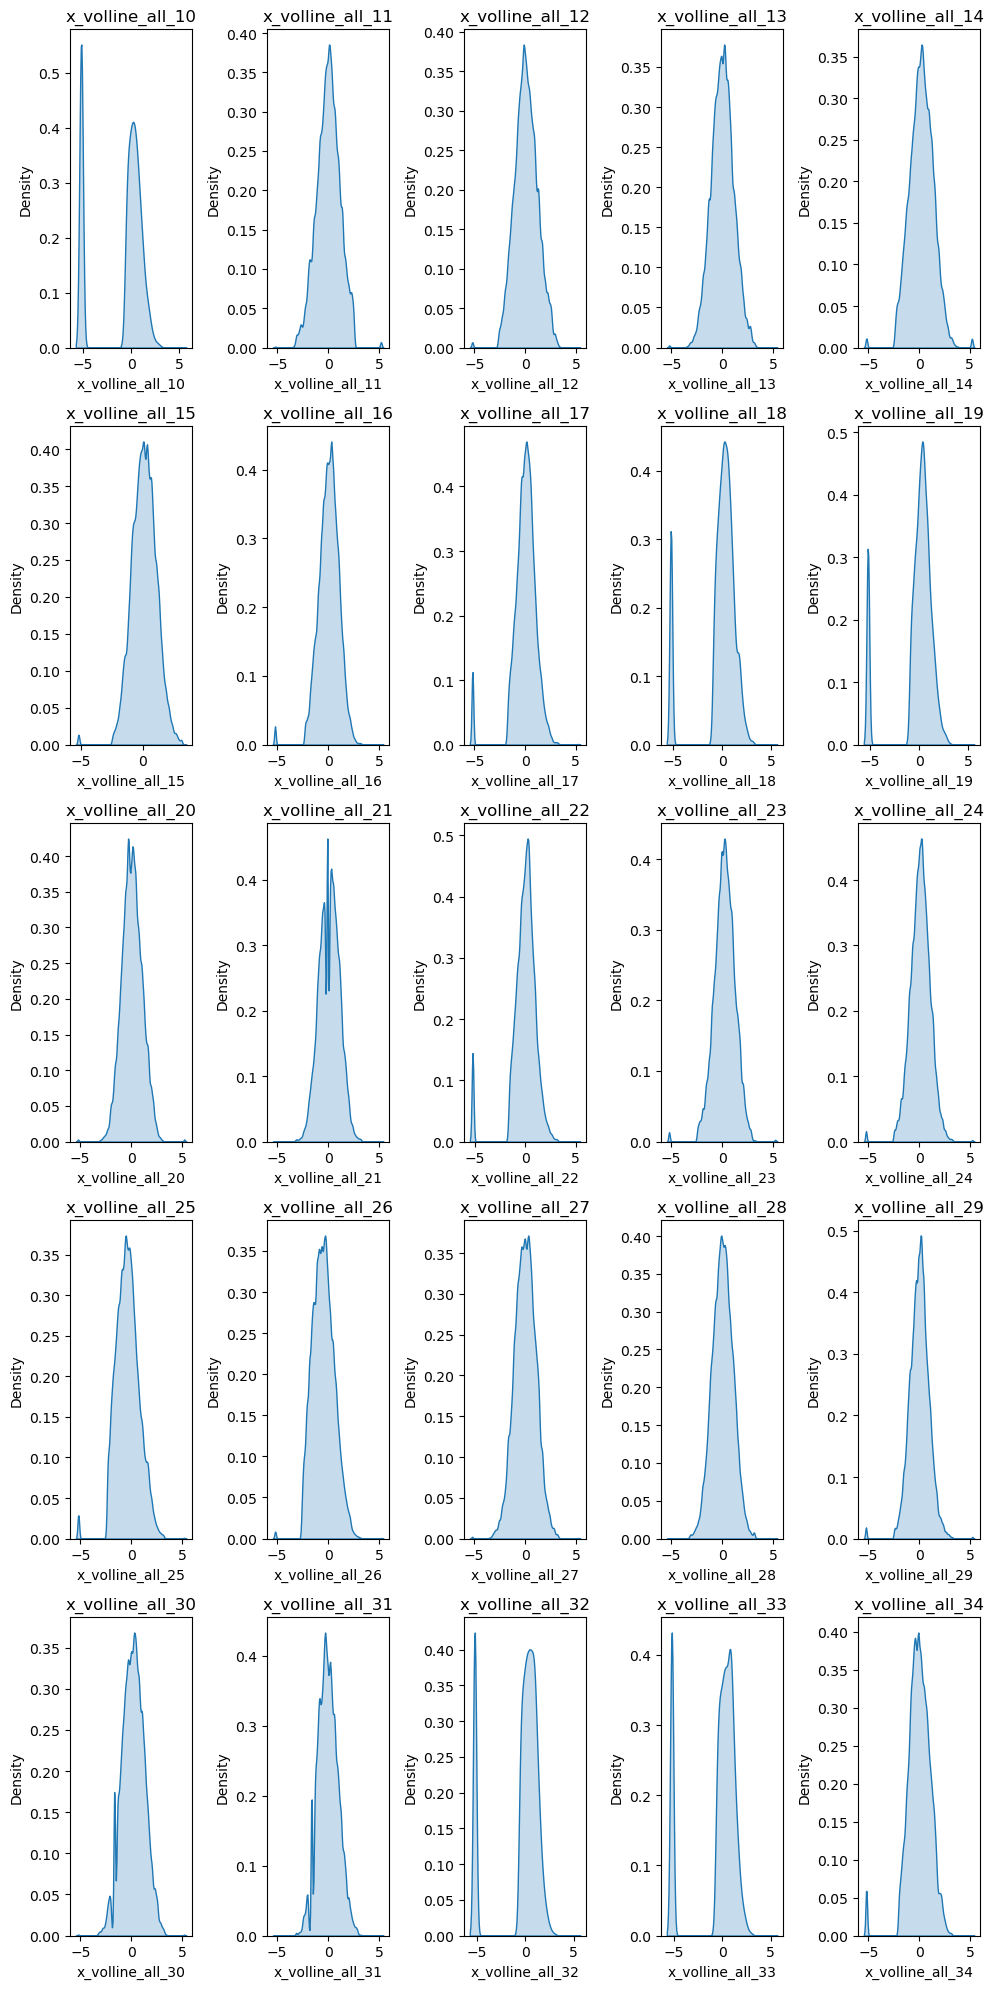

In [9]:
columns_to_plot = valid_x.columns[10:35]  # 选择前10列
plot_distribution(columns_to_plot)

/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

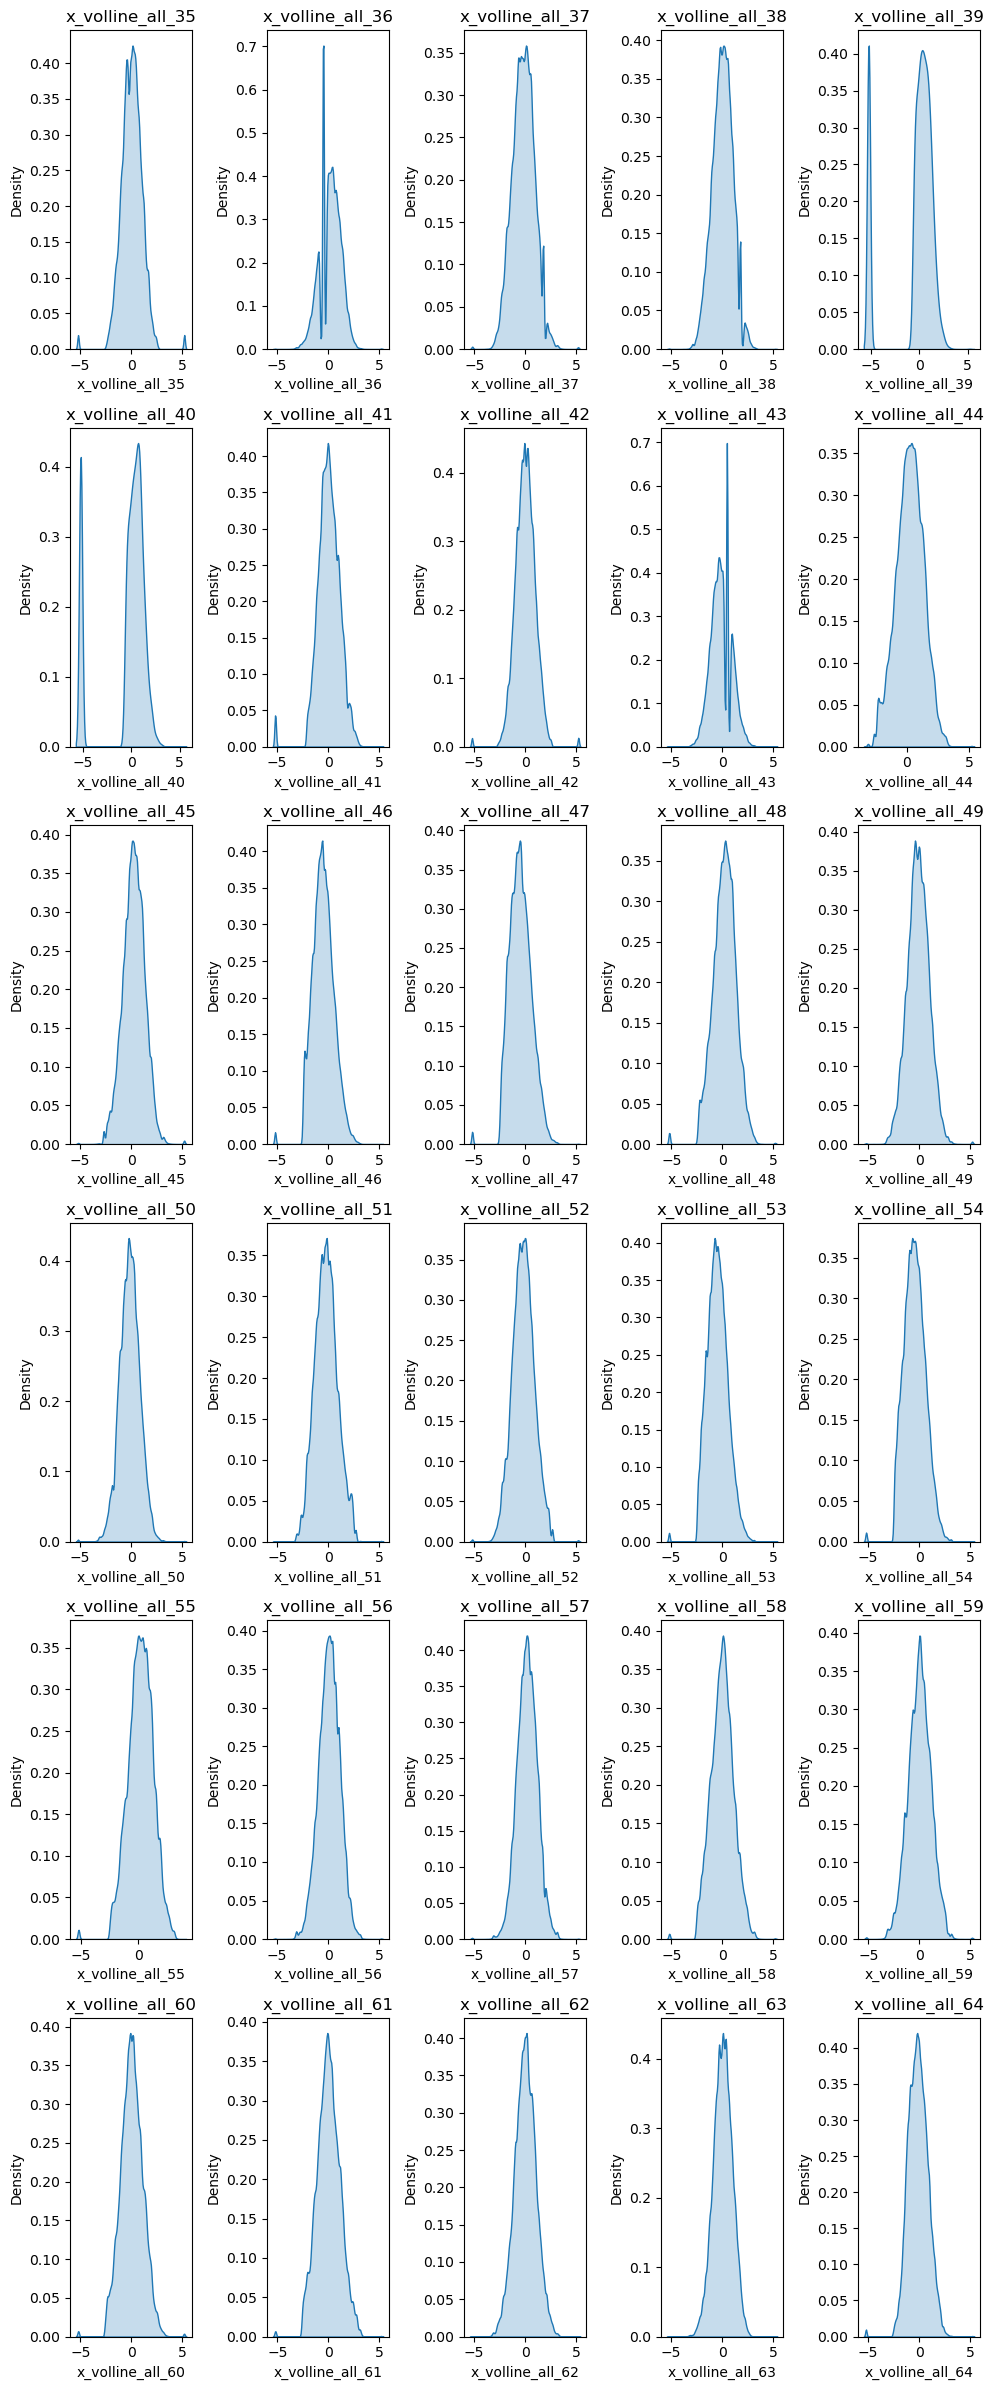

In [10]:
columns_to_plot = valid_x.columns[35:65]  # 选择前10列
plot_distribution(columns_to_plot)

/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

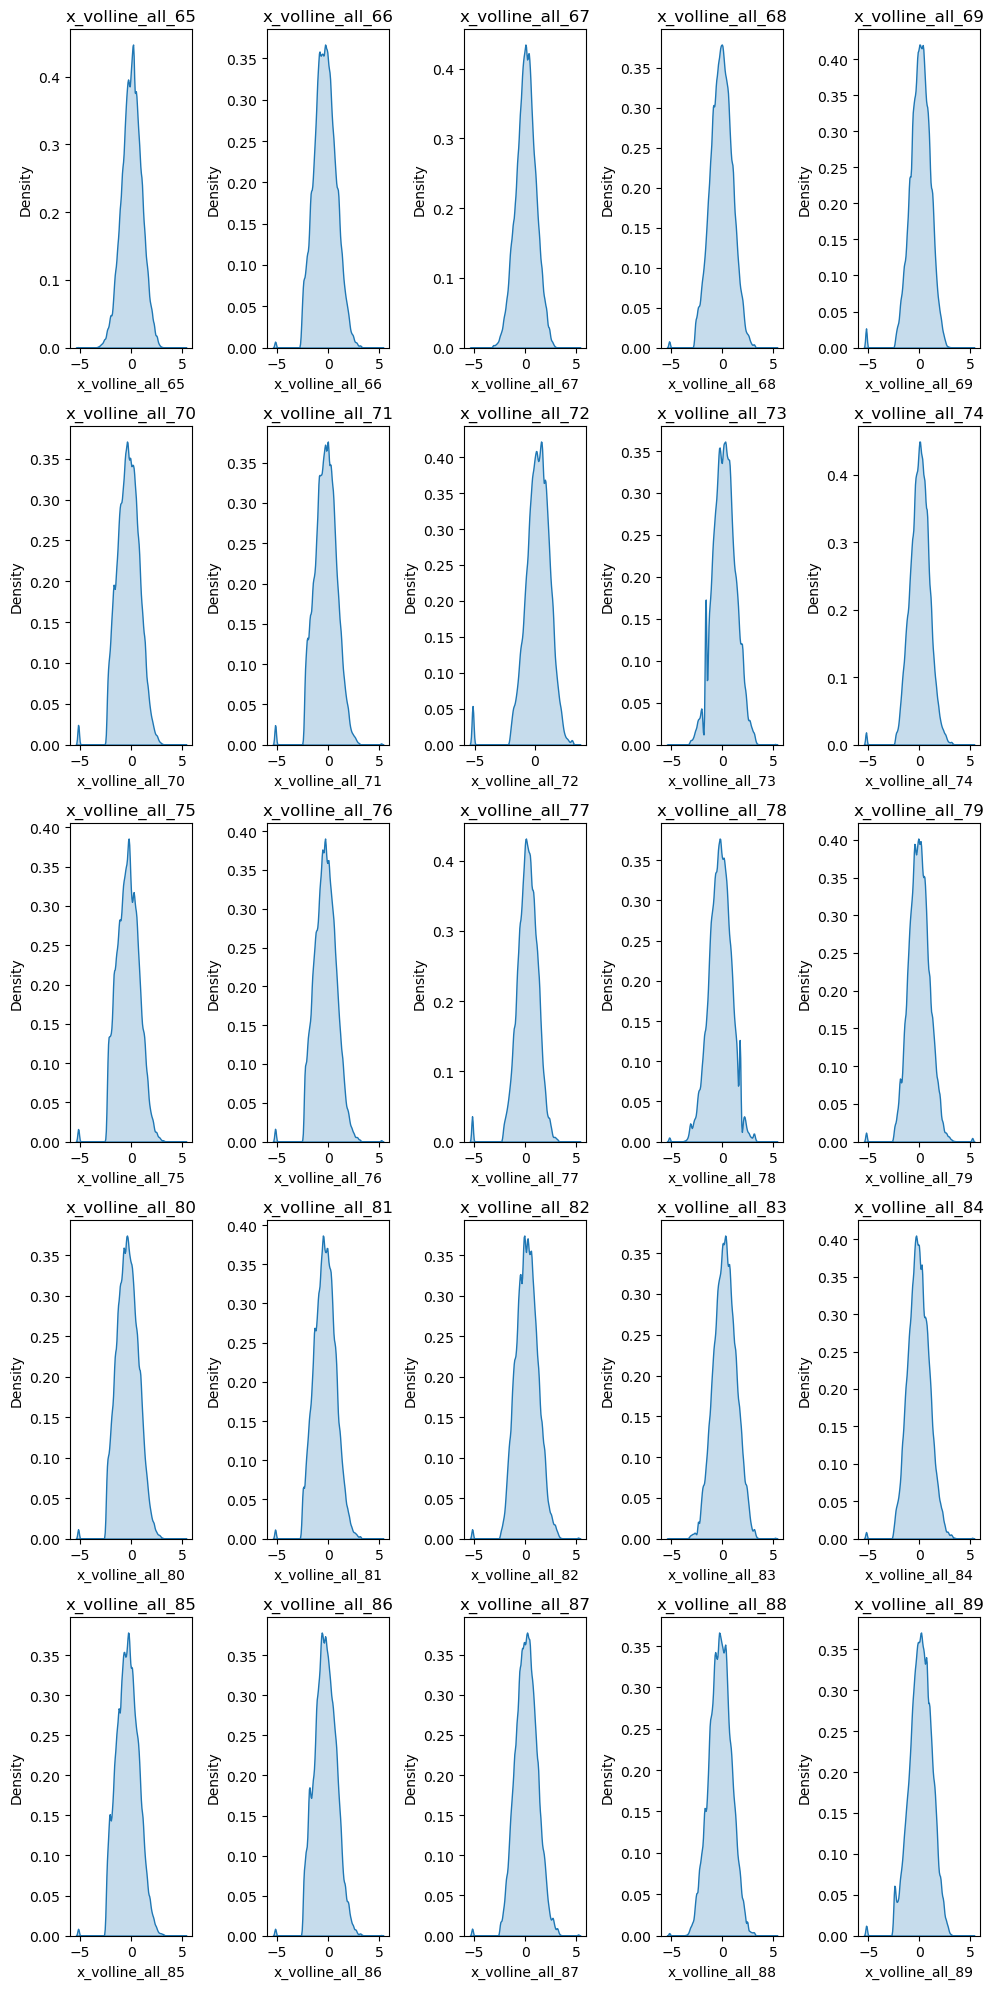

In [11]:
columns_to_plot = valid_x.columns[65:90]  # 选择前10列
plot_distribution(columns_to_plot)

/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

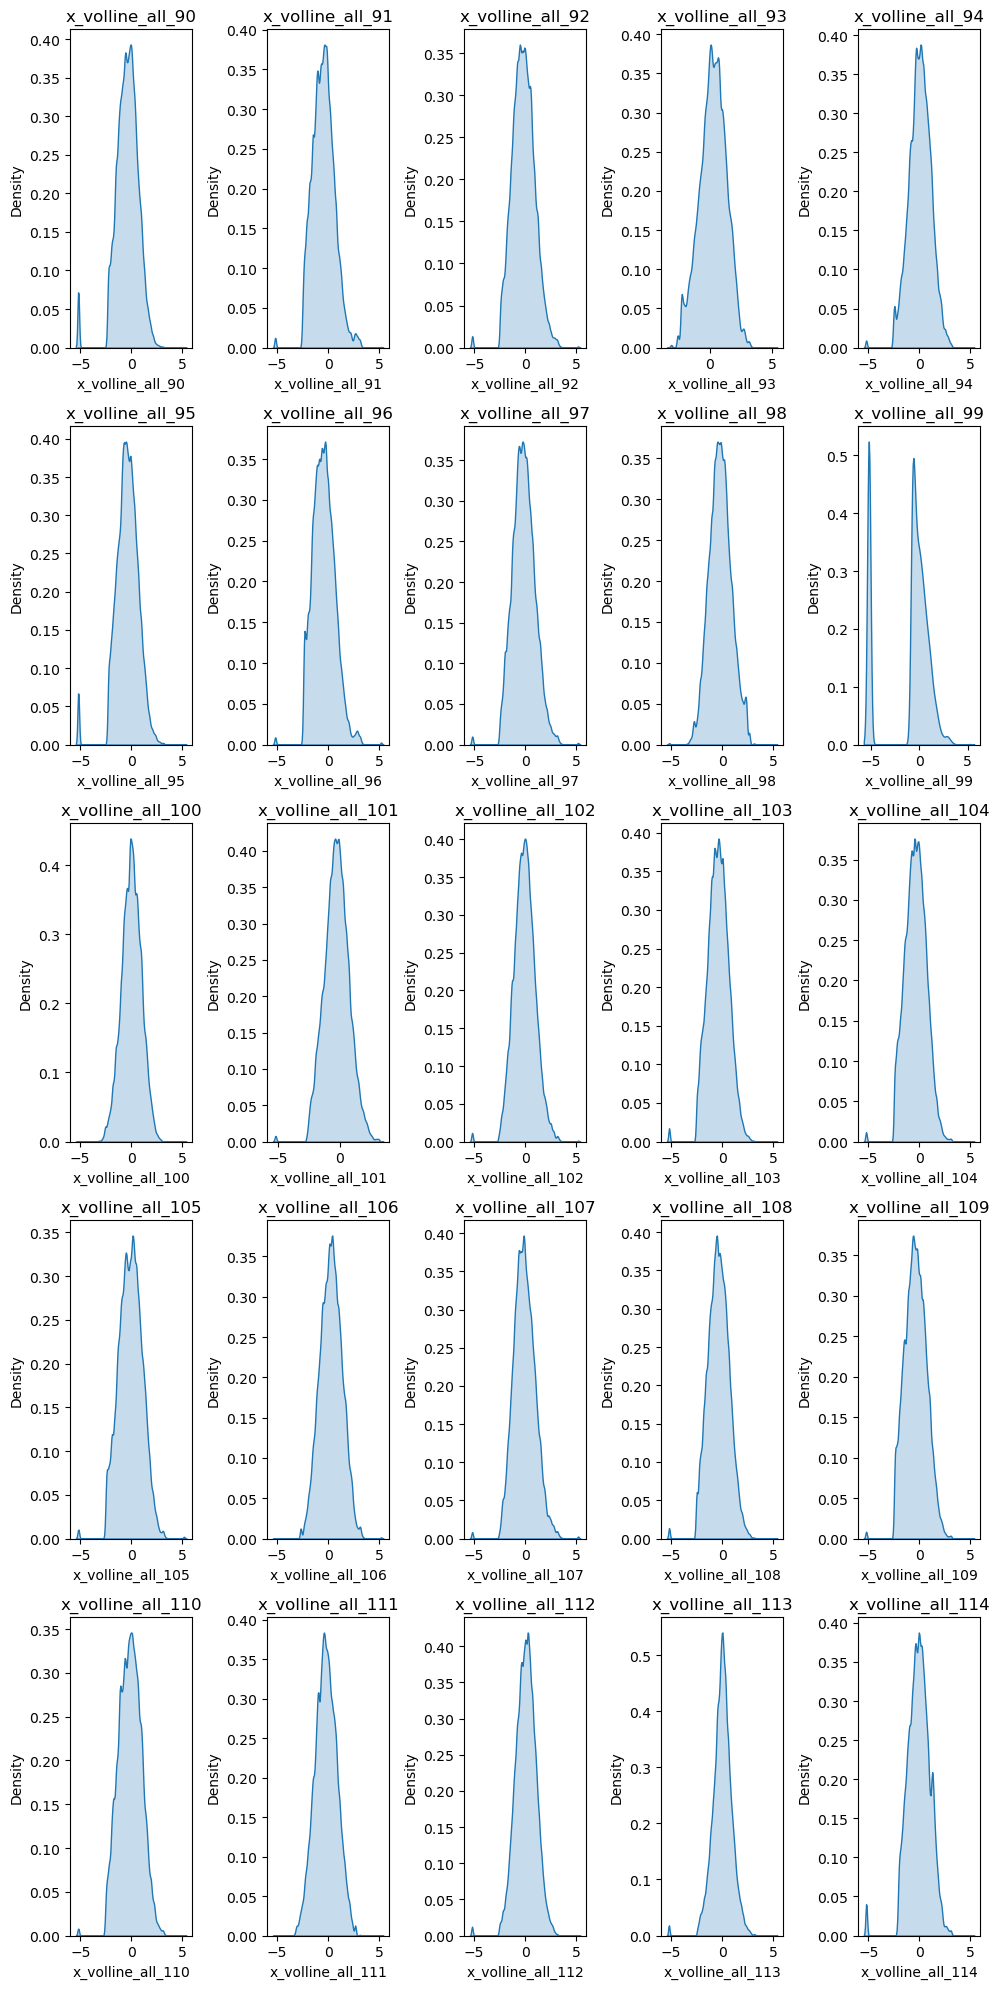

In [12]:
columns_to_plot = valid_x.columns[90:115]  # 选择前10列
plot_distribution(columns_to_plot)

/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

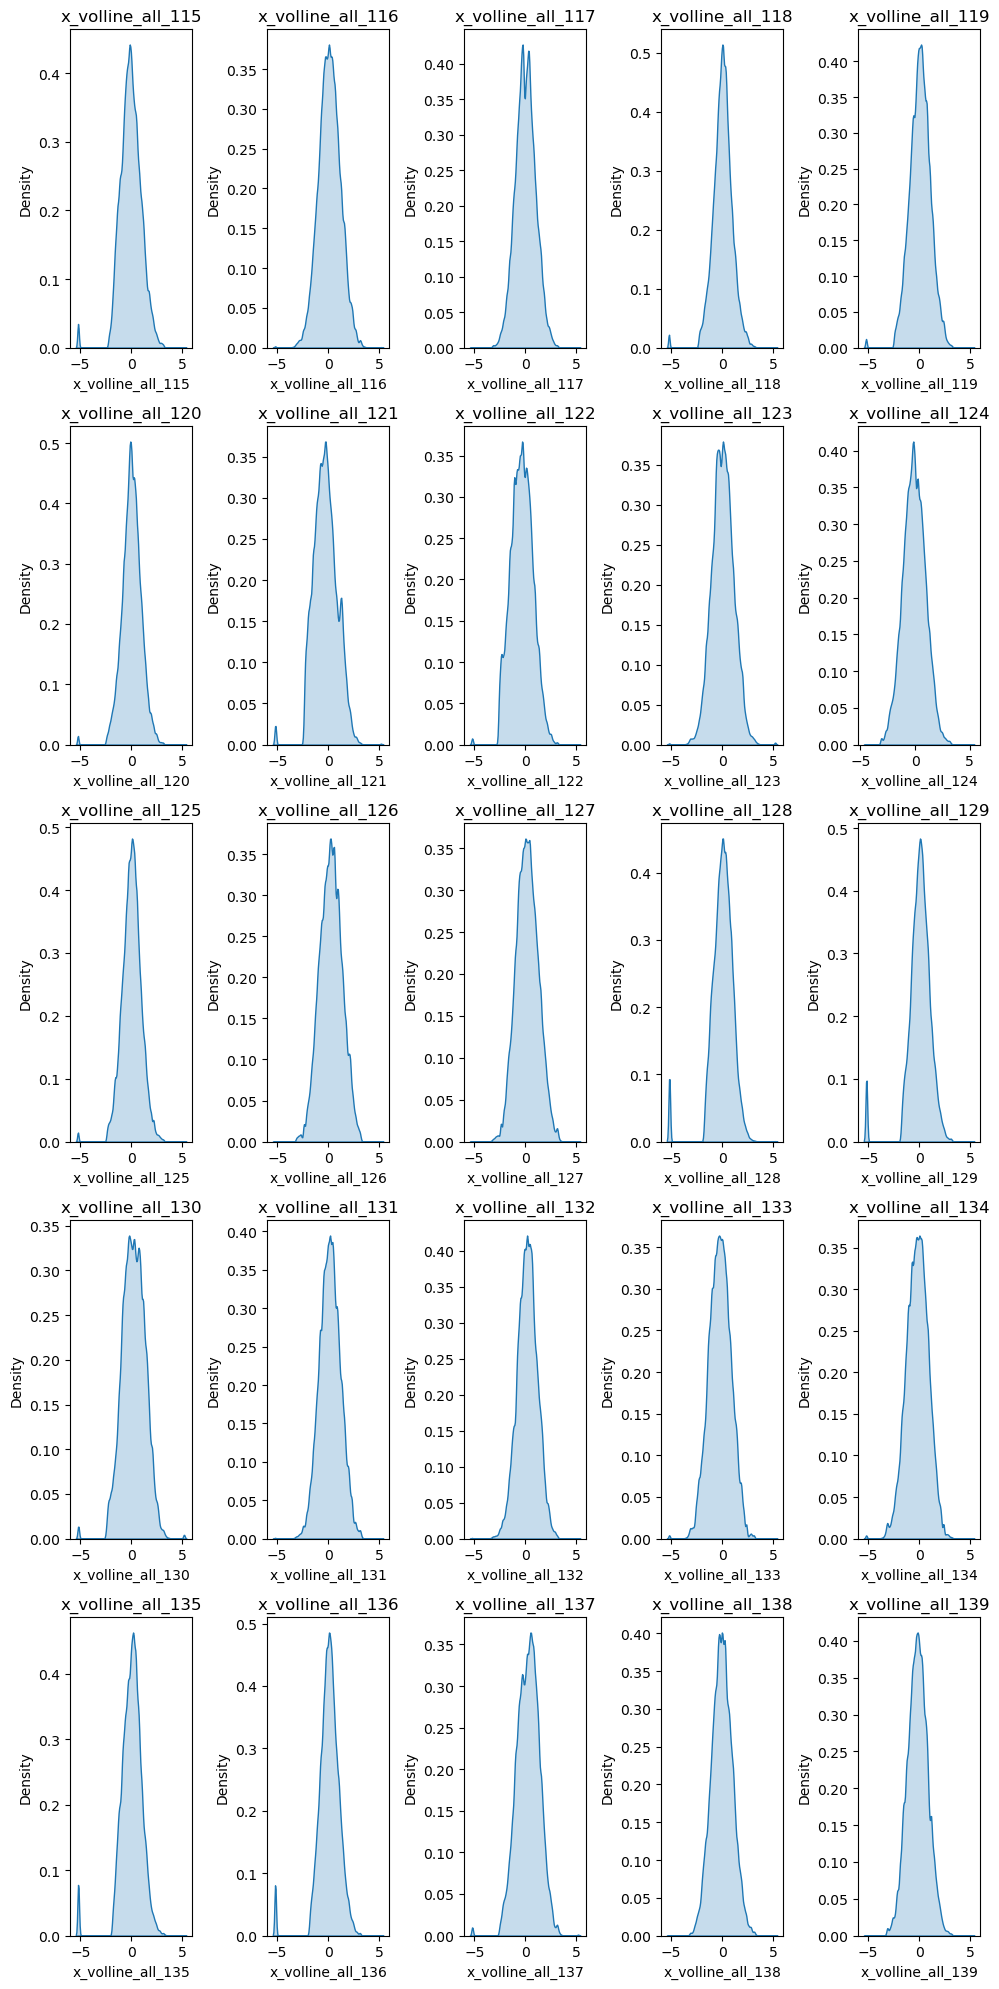

In [13]:
columns_to_plot = valid_x.columns[115:140]  # 选择前10列
plot_distribution(columns_to_plot)

/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_101769/4102193184.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(valid_x[col], shade=True)
/home/laiminzhi/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with p

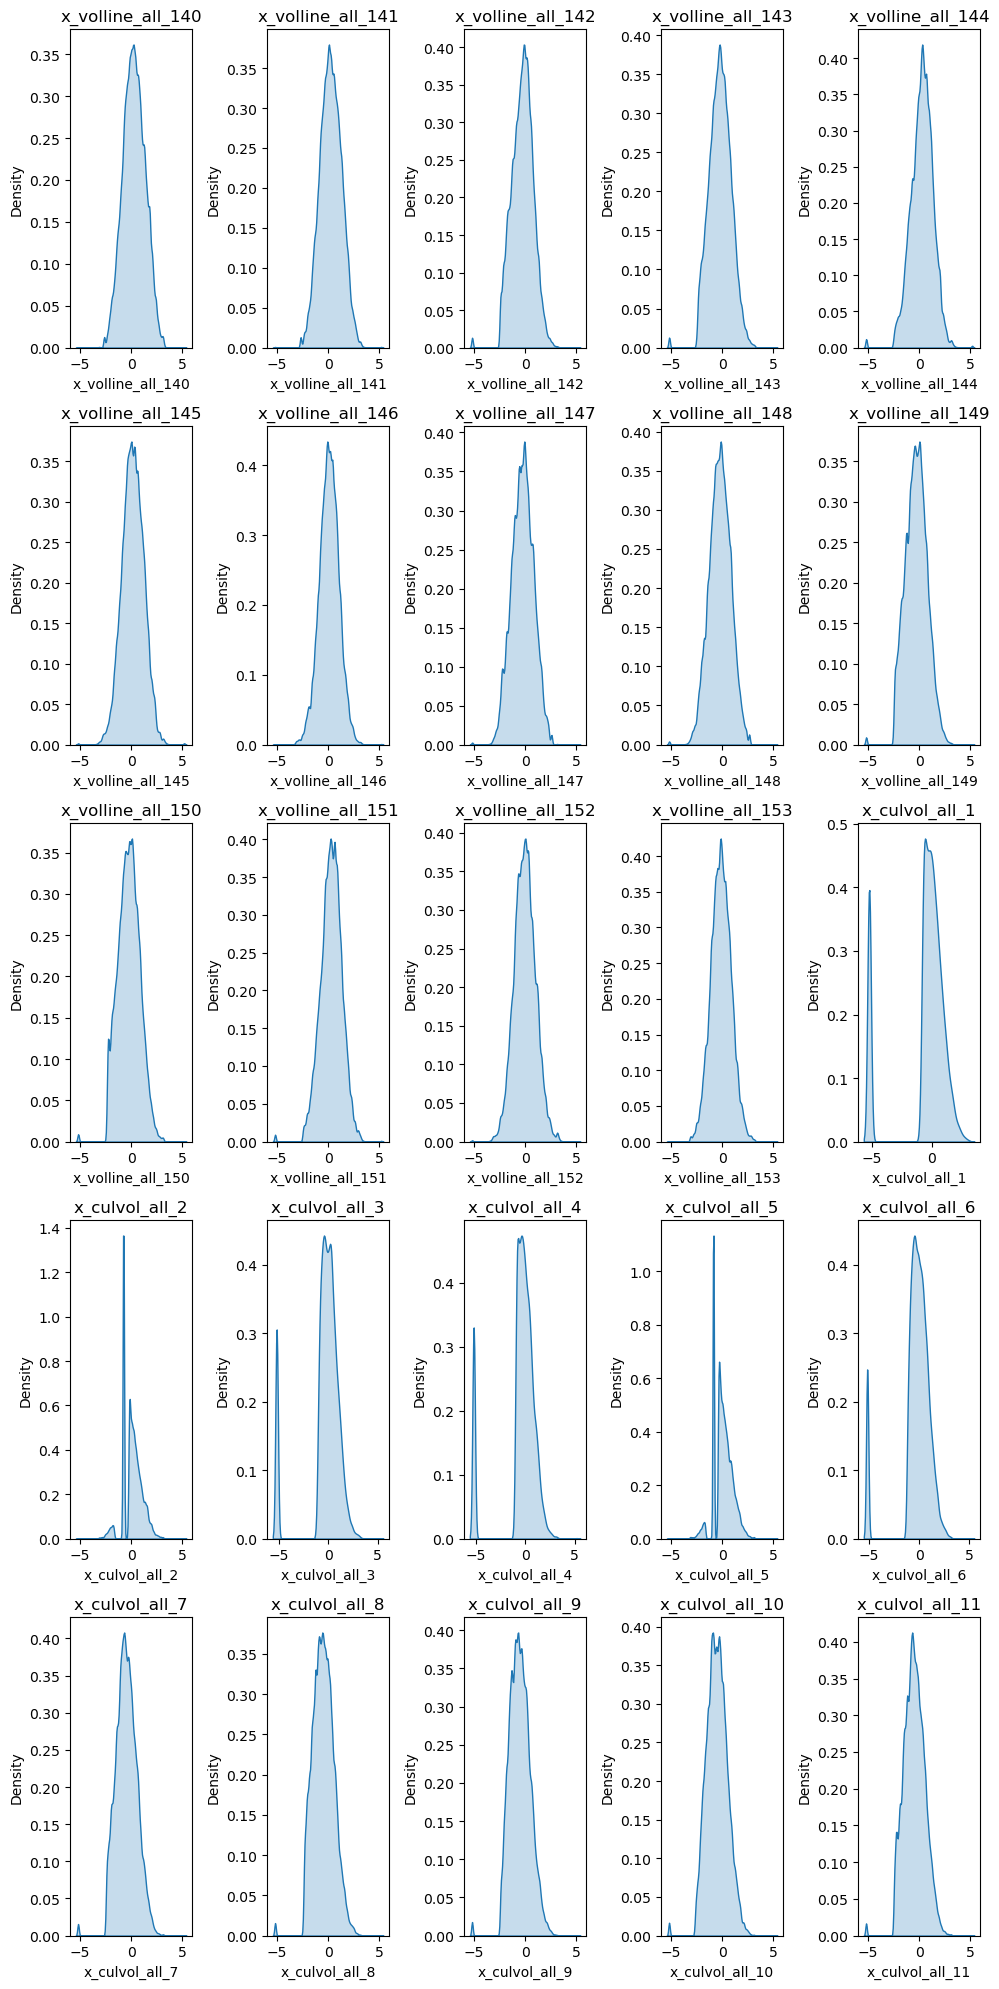

In [14]:
columns_to_plot = valid_x.columns[140:165]  # 选择前10列
plot_distribution(columns_to_plot)

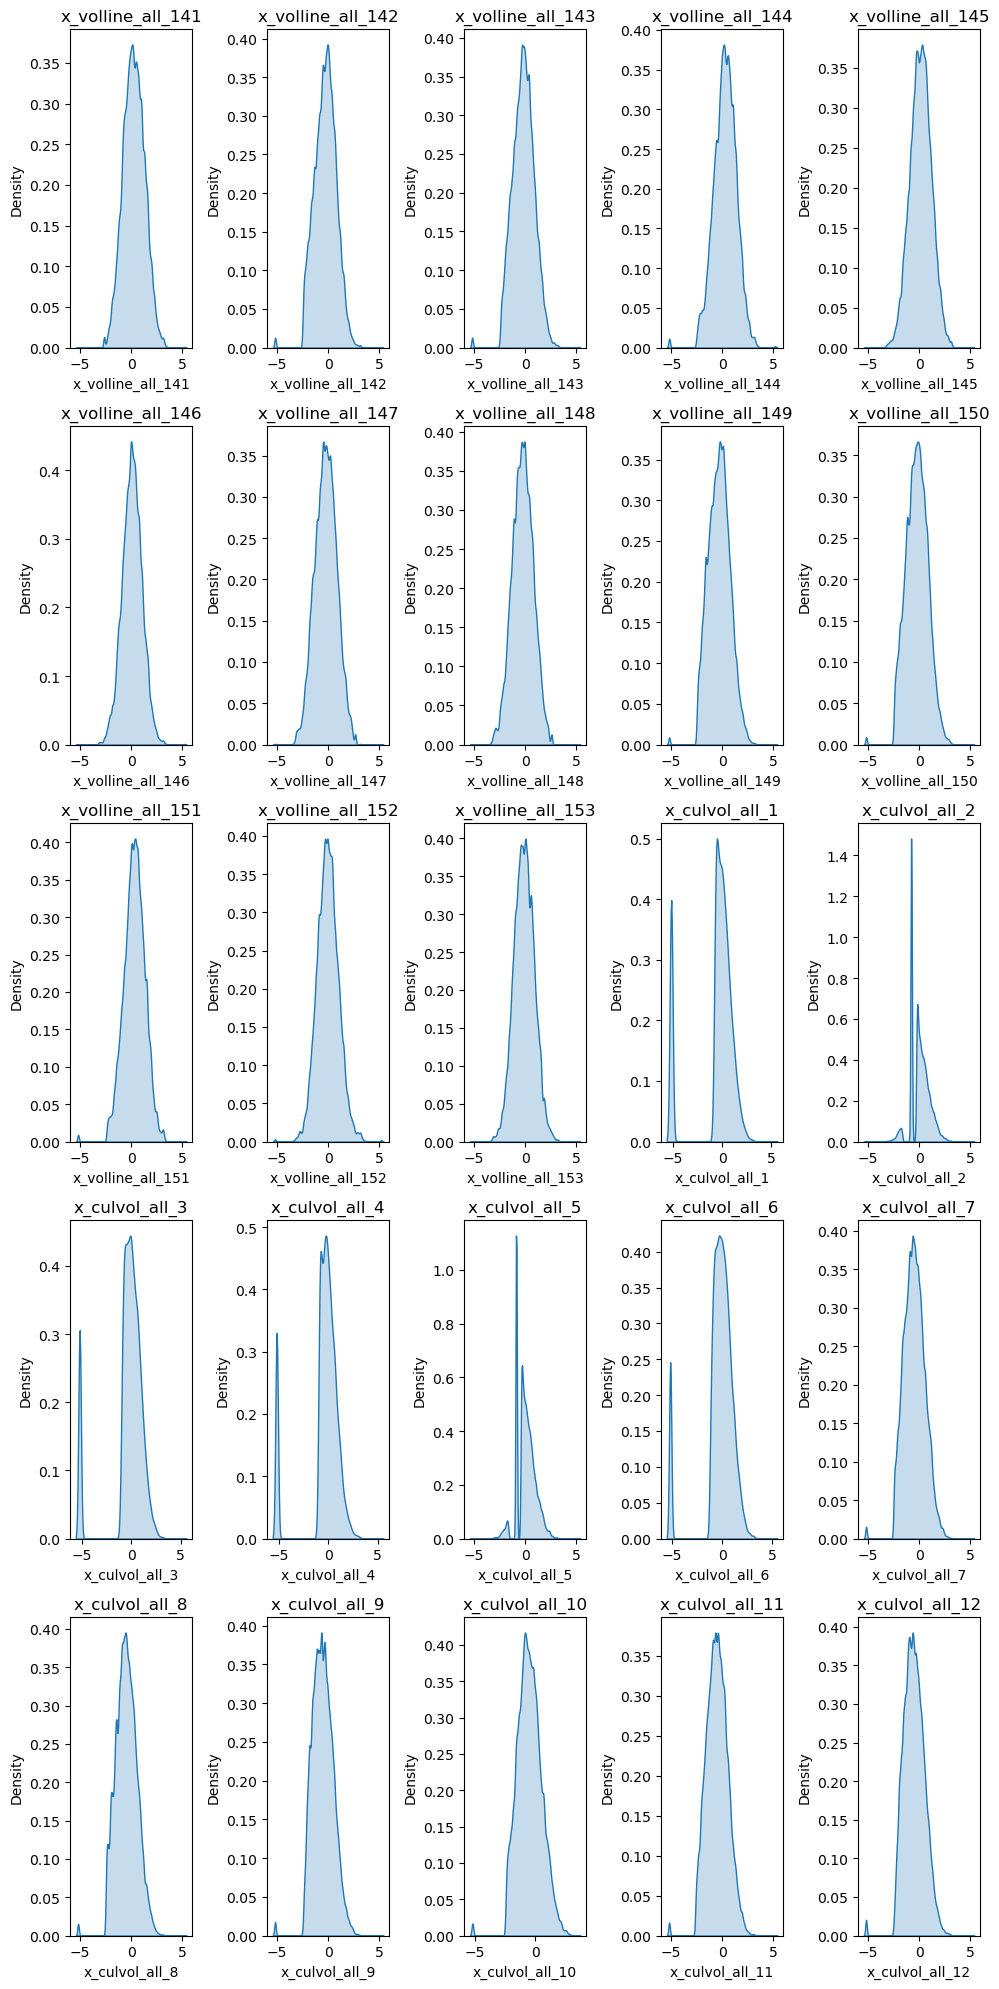

In [11]:
columns_to_plot = train_x.columns[140:165]  
plot_distribution(columns_to_plot)

In [12]:
import torch
print(torch.__version__)  # 查看 PyTorch 版本
print(torch.version.cuda)  # 查看 PyTorch 使用的 CUDA 版本
print(torch.backends.cudnn.version())  # 查看 cuDNN 版本

1.10.2
11.3
8200
